In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
from numpy.random import randint
import shutil
import random
from random import shuffle
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [14]:
train_labels = []
train_samples = []

In [15]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [16]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [17]:
for i in train_samples:
    print(i)

63
83
56
77
52
86
52
89
48
97
16
71
31
80
23
80
62
72
36
85
15
71
30
67
50
97
29
83
49
67
18
75
50
76
54
96
29
71
46
84
16
97
18
97
50
68
48
68
43
89
18
89
34
66
54
83
34
67
22
78
37
76
40
68
17
67
24
80
45
99
36
66
15
95
63
73
62
72
19
68
51
72
35
82
40
71
29
91
21
86
59
72
39
90
42
77
33
76
17
73
45
78
45
85
50
70
63
79
36
91
62
74
27
84
54
95
62
85
63
68
27
83
53
75
63
85
56
74
42
73
14
87
49
66
46
82
50
84
63
95
45
83
48
85
58
81
19
70
44
73
14
78
59
69
50
82
62
75
57
73
30
96
58
89
30
67
52
65
36
95
63
99
38
85
61
72
62
82
38
92
46
66
44
85
22
98
18
74
22
86
61
92
51
73
49
77
19
87
30
67
60
67
41
94
55
67
58
92
41
93
23
69
33
74
54
98
59
77
40
86
52
87
40
68
45
81
56
92
23
83
22
92
28
76
49
90
56
94
24
88
49
97
45
70
37
82
23
98
62
95
54
82
49
66
42
83
28
88
15
90
19
65
61
84
20
98
40
92
14
83
58
76
40
68
21
88
32
95
31
66
35
74
38
91
15
91
57
70
35
80
62
97
13
98
33
94
43
96
30
96
59
89
37
78
18
90
49
98
54
83
52
92
17
66
35
70
31
87
24
98
53
67
54
81
39
68
31
65
30
71
62
96
43
8

In [21]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_samples,train_labels = shuffle(train_samples,train_labels)

<ipython-input-21-423787914d69>:3: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  train_samples,train_labels = shuffle(train_samples,train_labels)


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
for i in scaled_train_samples:
    print(i)

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy

In [ ]:
model  = Sequential([
    Dense(units=16, input_shape=(1,),activation="relu"),
    Dense(units=32,activation="relu"),
    Dense(units=2,activation="softmax")
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

In [ ]:
test_labels = []
test_samples = []

In [ ]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples,test_labels = shuffle(test_samples,test_labels)

In [ ]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
rounded_predictions = np.argmax(predictions,axis=1)

In [ ]:
for i in rounded_predictions:
    print(i)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [ ]:
model.save('D:\srm\gen-Y\dlandnn\intro_model.h5')

In [ ]:
os.chdir('D:\srm\gen-Y\DeepLearing\dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [ ]:
train_path="D:/srm/gen-Y/DeepLearing/dogs-vs-cats/train"
valid_path="D:/srm/gen-Y/DeepLearing/dogs-vs-cats/valid"
test_path="D:/srm/gen-Y/DeepLearing/dogs-vs-cats/test"

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

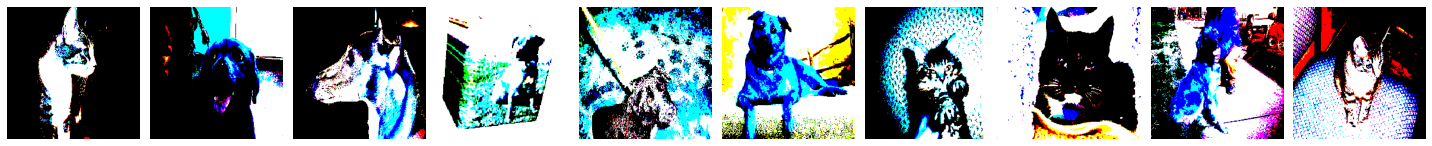

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), activation="relu", padding="same", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64, kernel_size = (3,3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [ ]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022E804AB430>>

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 57s - loss: 18.2953 - accuracy: 0.5770 - val_loss: 6.1630 - val_accuracy: 0.5950
Epoch 2/10
100/100 - 44s - loss: 2.2184 - accuracy: 0.7950 - val_loss: 3.4187 - val_accuracy: 0.6400
Epoch 3/10
100/100 - 52s - loss: 0.4289 - accuracy: 0.9020 - val_loss: 3.2607 - val_accuracy: 0.5600
Epoch 4/10
100/100 - 55s - loss: 0.2138 - accuracy: 0.9430 - val_loss: 3.2136 - val_accuracy: 0.6150
Epoch 5/10
100/100 - 55s - loss: 0.1803 - accuracy: 0.9640 - val_loss: 3.1736 - val_accuracy: 0.6000
Epoch 6/10
100/100 - 51s - loss: 0.1172 - accuracy: 0.9770 - val_loss: 3.2934 - val_accuracy: 0.5800
Epoch 7/10
100/100 - 47s - loss: 0.0931 - accuracy: 0.9820 - val_loss: 3.1919 - val_accuracy: 0.6100
Epoch 8/10
100/100 - 44s - loss: 0.0858 - accuracy: 0.9820 - val_loss: 3.5327 - val_accuracy: 0.5700
Epoch 9/10
100/100 - 44s - loss: 0.0490 - accuracy: 0.9850 - val_loss: 3.1242 - val_accuracy: 0.6300
Epoch 10/10
100/100 - 44s - loss: 0.0274 - accuracy: 0.9900 - val_loss: 2.7036 - val_accur

In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

NameError: name 'test_batches' is not defined